<a href="https://colab.research.google.com/github/aryachandrak/Machine-Learning-2024-Ganjil/blob/main/Jobsheet4/Tugas_Jobsheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas 1

## Soal 1
1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

### Import Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

### Membaca Data

In [ ]:
# Membaca data dari voice.csv
data = pd.read_csv('voice.csv')
print(data.head())  # Melihat 5 baris pertama

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

### Memisahkan Fitur dan Label

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = data.drop(columns='label')  # 'label' adalah kolom target
y = data['label']  # Kolom label berisi 'male' atau 'female'

### Pembagian Data Training dan Testing

In [ ]:
# Membagi dataset menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Normalisasi Data

In [ ]:
# Melakukan normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Membuat dan Melatih Model SVM

In [ ]:
# Membuat model SVM
model = SVC(kernel='linear')  # Menggunakan kernel linear, bisa juga coba 'rbf' atau lainnya

# Melatih model dengan data training
model.fit(X_train, y_train)


SVC(kernel='linear')

### Evaluasi Model

In [ ]:
# Melakukan prediksi dengan data testing
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy}')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))


Akurasi model: 0.9705573080967402
              precision    recall  f1-score   support

      female       0.97      0.97      0.97       452
        male       0.97      0.97      0.97       499

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



## Soal 2
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    * Menggunakan data spam.csv
    * Fitur CountVectorizer dengan mengaktifkan stop_words
    * Evaluasi hasilnya

### Membaca Data

In [ ]:
# Membaca file spam.csv dengan dua kolom pertama
data = pd.read_csv('/content/spam.csv', usecols=[0, 1], encoding='latin-1')

# Mengganti nama kolom agar lebih deskriptif
data.columns = ['label', 'text']

# Menampilkan 5 baris pertama untuk memastikan data sudah benar
print(data.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


### Memisahkan Fitur dan Label

In [ ]:
# Fitur adalah teks, label adalah spam/ham
X = data['text']
y = data['label']


### Fitur Ekstraksi dengan CountVectorizer

In [ ]:
# Menggunakan CountVectorizer dengan stop words
vectorizer = CountVectorizer(stop_words='english')

# Memasukkan teks ke dalam CountVectorizer
X_vectorized = vectorizer.fit_transform(X)


### Membagi Data untuk Training dan Testing

In [ ]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)


### Membuat dan Melatih Model Multinomial Naive Bayes

In [ ]:
# Membuat model Multinomial Naive Bayes
model = MultinomialNB()

# Melatih model dengan data training
model.fit(X_train, y_train)


MultinomialNB()

### Evaluasi Model

In [ ]:
# Evaluasi pada data training
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Akurasi pada data training: {accuracy_train}')
print("Laporan klasifikasi data training:")
print(classification_report(y_train, y_train_pred))

# Evaluasi pada data testing
y_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Akurasi pada data testing: {accuracy_test}')
print("Laporan klasifikasi data testing:")
print(classification_report(y_test, y_test_pred))


Akurasi pada data training: 0.9946153846153846
Laporan klasifikasi data training:
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      3372
        spam       1.00      0.96      0.98       528

    accuracy                           0.99      3900
   macro avg       1.00      0.98      0.99      3900
weighted avg       0.99      0.99      0.99      3900

Akurasi pada data testing: 0.9814593301435407
Laporan klasifikasi data testing:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.98      0.88      0.93       219

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



## Soal 3
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    * Menggunakan data spam.csv
    * Fitur TF-IDF dengan mengaktifkan stop_words
    * Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
    * Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

### Membaca Data

In [ ]:
# Membaca file spam.csv dengan dua kolom pertama
data = pd.read_csv('/content/spam.csv', usecols=[0, 1], encoding='latin-1')

# Mengganti nama kolom agar lebih deskriptif
data.columns = ['label', 'text']

# Menampilkan 5 baris pertama untuk memastikan data sudah benar
print(data.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


### Memisahkan Fitur dan Label

In [ ]:
# Fitur adalah teks, label adalah spam/ham
X = data['text']
y = data['label']


### Fitur Ekstraksi dengan TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Menggunakan TfidfVectorizer dengan stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Memasukkan teks ke dalam TF-IDF Vectorizer
X_tfidf = tfidf_vectorizer.fit_transform(X)


### Membagi Data untuk Training dan Testing

In [ ]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

### Membuat dan Melatih Model Multinomial Naive Bayes

In [ ]:
# Membuat model Multinomial Naive Bayes
model_tfidf = MultinomialNB()

# Melatih model dengan data training
model_tfidf.fit(X_train, y_train)


MultinomialNB()

### Evaluasi Model

In [ ]:
# Evaluasi pada data training
y_train_pred = model_tfidf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Akurasi pada data training (TF-IDF): {accuracy_train}')
print("Laporan klasifikasi data training (TF-IDF):")
print(classification_report(y_train, y_train_pred))

# Evaluasi pada data testing
y_test_pred = model_tfidf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Akurasi pada data testing (TF-IDF): {accuracy_test}')
print("Laporan klasifikasi data testing (TF-IDF):")
print(classification_report(y_test, y_test_pred))


Akurasi pada data training (TF-IDF): 0.9797435897435898
Laporan klasifikasi data training (TF-IDF):
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      3372
        spam       1.00      0.85      0.92       528

    accuracy                           0.98      3900
   macro avg       0.99      0.93      0.95      3900
weighted avg       0.98      0.98      0.98      3900

Akurasi pada data testing (TF-IDF): 0.9677033492822966
Laporan klasifikasi data testing (TF-IDF):
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1453
        spam       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



### Kesimpulan
Berdasarkan hasil evaluasi di atas, CountVectorizer dengan stop words memberikan performa yang lebih baik secara keseluruhan pada data spam.csv. Meskipun TF-IDF memberikan precision yang sangat tinggi pada spam, model CountVectorizer lebih seimbang antara precision dan recall, dan secara keseluruhan, akurasi serta f1-score lebih baik.
  
Oleh karena itu, CountVectorizer lebih direkomendasikan untuk kasus deteksi spam pada dataset ini.

# Tugas 2

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.



In [ ]:
import zipfile
import os

# Nama file zip
zip_file = 'images.zip'

# Cek apakah file .zip ada
if os.path.exists(zip_file):
    # Buat folder tujuan jika belum ada
    extract_path = 'images'
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)

    # Ekstrak file .zip ke dalam folder 'images'
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f'File {zip_file} berhasil diekstrak ke folder {extract_path}')
else:
    print(f'File {zip_file} tidak ditemukan.')


File images.zip berhasil diekstrak ke folder images


In [ ]:
import cv2
import numpy as np
import os

def extract_histogram(image_path, bins=32):
    image = cv2.imread(image_path)
    # Resize gambar
    image = cv2.resize(image, (128, 128))
    # Hitung histogram untuk setiap channel warna (RGB)
    hist = []
    for i in range(3):  # Untuk channel R, G, B
        channel_hist = cv2.calcHist([image], [i], None, [bins], [0, 256])
        hist.extend(channel_hist.flatten())
    return np.array(hist)

def load_data(image_folder, label):
    data = []
    labels = []
    for img_file in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_file)
        hist_features = extract_histogram(img_path)
        data.append(hist_features)
        labels.append(label)
    return np.array(data), np.array(labels)

# Folder untuk training dan test
train_day_folder = '/content/images/images/training/day'
train_night_folder = '/content/images/images/training/night'
test_day_folder = '/content/images/images/test/day'
test_night_folder = '/content/images/images/test/night'

# Load data training
X_train_day, y_train_day = load_data(train_day_folder, 0)  # 0 untuk day
X_train_night, y_train_night = load_data(train_night_folder, 1)  # 1 untuk night

# Load data test
X_test_day, y_test_day = load_data(test_day_folder, 0)
X_test_night, y_test_night = load_data(test_night_folder, 1)

# Gabungkan data day dan night
X_train = np.vstack((X_train_day, X_train_night))
y_train = np.hstack((y_train_day, y_train_night))
X_test = np.vstack((X_test_day, X_test_night))
y_test = np.hstack((y_test_day, y_test_night))

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score


# Buat pipeline untuk normalisasi data dan SVM
model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Latih model dengan data training
model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test)

# Evaluasi performa model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        80
           1       0.93      0.97      0.95        80

    accuracy                           0.95       160
   macro avg       0.95      0.95      0.95       160
weighted avg       0.95      0.95      0.95       160



In [ ]:
import matplotlib.pyplot as plt
def load_data(image_folder, label):
    data = []
    labels = []
    for img_file in os.listdir(image_folder):
        img_path = os.path.join(image_folder, img_file)
        hist_features = extract_histogram(img_path)
        data.append(hist_features)
        labels.append(label)

    return np.array(data), np.array(labels)


In [ ]:
X_train_day, y_train_day = load_data(train_day_folder, 0)  # 0 untuk day

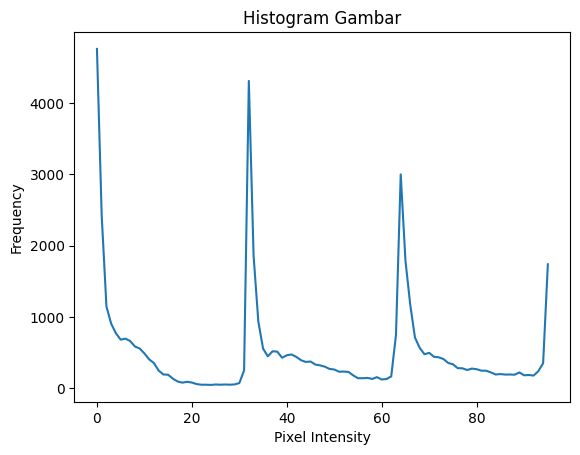

In [ ]:
plt.plot(X_train_night[0])
plt.title('Histogram Gambar')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()